# Lab_3

### 1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule data: 
bioresponse.csv, description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 
Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.
### 2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.
### 3.	For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with 

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
EPS = 0.001

In [2]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [3]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [4]:
dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


In [5]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def propagate_sgd(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]
    # print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = -(1. / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)  # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    random_indexes = np.random.choice(X.shape[1], 100, replace=False)
    X_ = X[:, random_indexes]
    A_ = A[:, random_indexes]
    Y_ = Y[random_indexes]
    dw = (1. / m) * np.dot(X_, (A_ -  Y_).T)
    db = (1. / m) * np.sum(A_ - Y_, axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [6]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


In [7]:
# optimize
from numpy.random import permutation, randint

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False, mode="GD"):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    mode -- "GD"/"SGD"/"adam", defaults to "GD"
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    if mode == "adam":
        b1 = 0.9
        b2 = 0.999 
        # Variable Initialization
        num_param = X.shape[0]
    
        m_w = np.zeros((num_param, 1)) # two m for each parameter
        v_w = np.zeros((num_param, 1)) # two v for each parameter
        g_w = np.zeros((num_param, 1)) # two gradient

        num_param_b = 1
        m_b = np.zeros((num_param_b, 1)) # two m for each parameter
        v_b = np.zeros((num_param_b, 1)) # two v for each parameter
        g_b = np.zeros((num_param_b, 1)) # two gradient            
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        if mode == "SGD":
          grads, cost = propagate_sgd(w,b,X,Y)
        elif mode == "adam":
          grads, cost = propagate_sgd(w,b,X,Y)        
        else:
          grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        if mode == "adam":
            # Update the m and v parameter
            m_w = b1*m_w + (1 - b1)*dw
            v_w = b2*v_w + (1 - b2)*(dw**2)

            m_b = b1*m_b + (1 - b1)*db
            v_b = b2*v_b + (1 - b2)*(db**2)

            # Bias correction for m and v
            m_cor_w = m_w / (1 - (b1**(i+1))) 
            v_cor_w = v_w / (1 - (b2**(i+1)))
         
            m_cor_b = m_b / (1 - (b1**(i+1))) 
            v_cor_b = v_b / (1 - (b2**(i+1)))
 
            # Update the parameter  
            w = w - (learning_rate / (np.sqrt(v_cor_w) + EPS))*m_cor_w
            b = b - (learning_rate / (np.sqrt(v_cor_b) + EPS))*m_cor_b            
        else:          
          w -=learning_rate*dw
          b -=learning_rate*db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [8]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.002955
Cost after iteration 100: 0.002683
Cost after iteration 200: 0.002461
Cost after iteration 300: 0.002278
Cost after iteration 400: 0.002124
Cost after iteration 500: 0.001991
Cost after iteration 600: 0.001877
Cost after iteration 700: 0.001777
Cost after iteration 800: 0.001689
Cost after iteration 900: 0.001611
w = [[ 0.99092423]
 [-1.08149946]]
b = [3.99591156]
dw = [[0.00128065]
 [0.01144573]]
db = [0.00041775]


In [9]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [10]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [11]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [12]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [13]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, mode="GD"):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost, mode=mode)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [14]:
df = pd.read_csv('bioresponse.csv', header=0, sep=',')
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = df['Activity'].values
x = df.drop(['Activity'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)
x_train = np.asarray(x_train.T)
x_test = np.asarray(x_test.T)
y_train = np.asarray(y_train.T)
y_test = np.asarray(y_test.T)

print('GD, learning_rate = 0.00001')
print('============')
gd1 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.00001, print_cost = True, mode="GD")
print('GD, learning_rate = 0.0001')
print('============')
gd2 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.0001, print_cost = True, mode="GD")
print('GD, learning_rate = 0.001')
print('============')
gd3 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, mode="GD")
print('GD, learning_rate = 0.01')
print('============')
gd4 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True, mode="GD")
print('GD, learning_rate = 0.02')
print('============')
gd5 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.02, print_cost = True, mode="GD")
print('SGD, learning_rate = 0.00001')
print('============')
sgd1 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.00001, print_cost = True, mode="SGD")
print('SGD, learning_rate = 0.0001')
print('============')
sgd2 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.0001, print_cost = True, mode="SGD")
print('SGD, learning_rate = 0.001')
print('============')
sgd3 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, mode="SGD")
print('SGD, learning_rate = 0.01')
print('============')
sgd4 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True, mode="SGD")
print('SGD, learning_rate = 0.02')
print('============')
sgd5 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.02, print_cost = True, mode="SGD")
print('Adam, learning_rate = 0.00001')
print('============')
adam1 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.00001, print_cost = True, mode="adam")
print('Adam, learning_rate = 0.0001')
print('============')
adam2 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.0001, print_cost = True, mode="adam")
print('Adam, learning_rate = 0.001')
print('============')
adam3 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, mode="adam")
print('Adam, learning_rate = 0.01')
print('============')
adam4 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True, mode="adam")
print('Adam, learning_rate = 0.02')
print('============')
adam5 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.02, print_cost = True, mode="adam")

GD, learning_rate = 0.00001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.692908
Cost after iteration 200: 0.692673
Cost after iteration 300: 0.692443
Cost after iteration 400: 0.692218
Cost after iteration 500: 0.691997
Cost after iteration 600: 0.691780
Cost after iteration 700: 0.691567
Cost after iteration 800: 0.691358
Cost after iteration 900: 0.691154
Cost after iteration 1000: 0.690953
Cost after iteration 1100: 0.690756
Cost after iteration 1200: 0.690562
Cost after iteration 1300: 0.690372
Cost after iteration 1400: 0.690185
Cost after iteration 1500: 0.690002
Cost after iteration 1600: 0.689822
Cost after iteration 1700: 0.689645
Cost after iteration 1800: 0.689471
Cost after iteration 1900: 0.689300
train accuracy: 53.99928901528617 %
test accuracy: 54.90405117270789 %
GD, learning_rate = 0.0001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.690952
Cost after iteration 200: 0.689130
Cost after iteration 300: 0.687589
Cost after iteration 400: 0.

Cost after iteration 100: 0.690120
Cost after iteration 200: 0.687786
Cost after iteration 300: 0.685834
Cost after iteration 400: 0.684315
Cost after iteration 500: 0.683042
Cost after iteration 600: 0.681673
Cost after iteration 700: 0.680459
Cost after iteration 800: 0.679353
Cost after iteration 900: 0.678253
Cost after iteration 1000: 0.677181
Cost after iteration 1100: 0.676206
Cost after iteration 1200: 0.675211
Cost after iteration 1300: 0.674242
Cost after iteration 1400: 0.673235
Cost after iteration 1500: 0.672257
Cost after iteration 1600: 0.671319
Cost after iteration 1700: 0.670353
Cost after iteration 1800: 0.669378
Cost after iteration 1900: 0.668434
train accuracy: 58.90508354070387 %
test accuracy: 59.808102345415776 %
Adam, learning_rate = 0.0001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.677186
Cost after iteration 200: 0.667579
Cost after iteration 300: 0.658728
Cost after iteration 400: 0.650834
Cost after iteration 500: 0.643699
Cost after itera

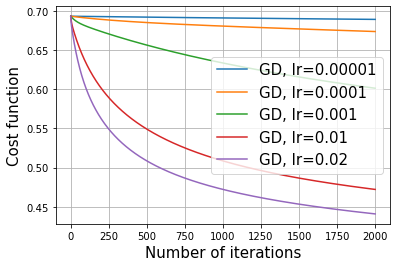

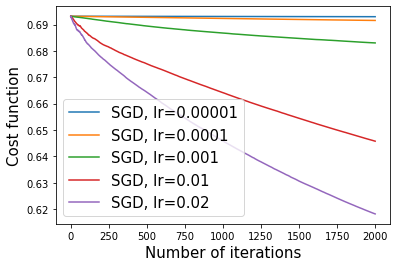

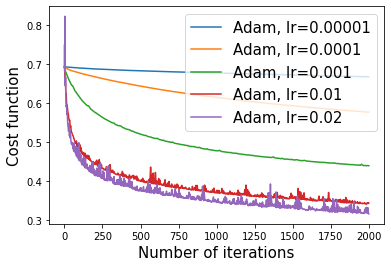

In [16]:
plot_x = list(range(0, len(gd1["costs"])))

plt.figure()
plt.grid()
plt.plot(plot_x, gd1["costs"], label="GD, lr=0.00001")
plt.plot(plot_x, gd2["costs"], label="GD, lr=0.0001")
plt.plot(plot_x, gd3["costs"], label="GD, lr=0.001")
plt.plot(plot_x, gd4["costs"], label="GD, lr=0.01")
plt.plot(plot_x, gd5["costs"], label="GD, lr=0.02")
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'Cost function',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
plt.plot(plot_x, sgd1["costs"], label="SGD, lr=0.00001")
plt.plot(plot_x, sgd2["costs"], label="SGD, lr=0.0001")
plt.plot(plot_x, sgd3["costs"], label="SGD, lr=0.001")
plt.plot(plot_x, sgd4["costs"], label="SGD, lr=0.01")
plt.plot(plot_x, sgd5["costs"], label="SGD, lr=0.02")
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'Cost function',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
plt.plot(plot_x, adam1["costs"], label="Adam, lr=0.00001")
plt.plot(plot_x, adam2["costs"], label="Adam, lr=0.0001")
plt.plot(plot_x, adam3["costs"], label="Adam, lr=0.001")
plt.plot(plot_x, adam4["costs"], label="Adam, lr=0.01")
plt.plot(plot_x, adam5["costs"], label="Adam, lr=0.02")
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'Cost function',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [17]:
print('GD, learning_rate = 0.001')
print('============')
gd = model(x_train, y_train, x_test, y_test, num_iterations = 50, learning_rate = 0.001, print_cost = True, mode="GD")
print('SGD, learning_rate = 0.001')
print('============')
sgd = model(x_train, y_train, x_test, y_test, num_iterations = 50, learning_rate = 0.001, print_cost = True, mode="SGD")
print('Adam, learning_rate = 0.001')
print('============')
adam = model(x_train, y_train, x_test, y_test, num_iterations = 50, learning_rate = 0.001, print_cost = True, mode="adam")

GD, learning_rate = 0.001
Cost after iteration 0: 0.693147
train accuracy: 53.99928901528617 %
test accuracy: 54.90405117270789 %
SGD, learning_rate = 0.001
Cost after iteration 0: 0.693147
train accuracy: 53.99928901528617 %
test accuracy: 54.90405117270789 %
Adam, learning_rate = 0.001
Cost after iteration 0: 0.693147
train accuracy: 66.79701386420192 %
test accuracy: 68.01705756929637 %


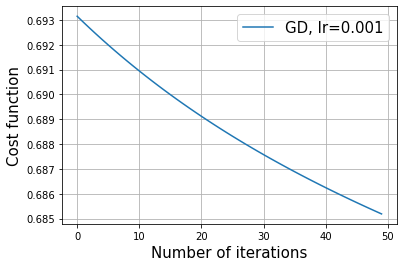

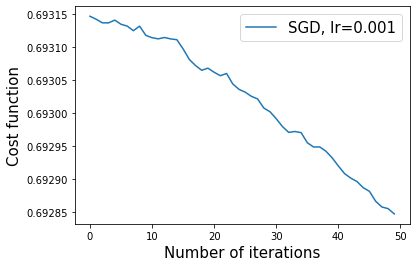

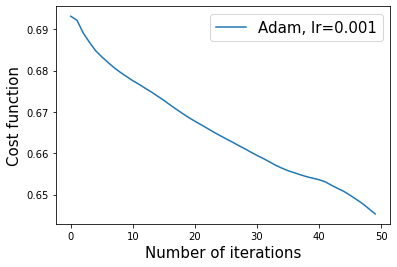

In [18]:
plot_x = list(range(0, len(gd["costs"])))
plt.figure()
plt.grid()
plt.plot(plot_x, gd["costs"], label="GD, lr=0.001")
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'Cost function',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
plt.plot(plot_x, sgd["costs"], label="SGD, lr=0.001")
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'Cost function',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
plt.plot(plot_x, adam["costs"], label="Adam, lr=0.001")
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'Cost function',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()